In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
data = pd.read_csv("/content/Algerian_forest_fires_dataset.csv")
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


# **Exploratory Data Analysis**

In [75]:
data = data.drop(["day", "month", "year"], axis = 1)  #Dropping them as their is no use in prediction

In [76]:
data[data.isnull().any(axis = 1)]

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [77]:
rows_to_drop = data.index[[122,123,124,168]]

# Drop those rows
data = data.drop(index=rows_to_drop).reset_index(drop=True)

In [78]:
data.loc[:122, "Region"] = 0
data.loc[122:, "Region"] = 1
data.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [79]:
data.columns

Index(['Temperature', ' RH', ' Ws', 'Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [80]:
data.columns = data.columns.str.strip()  #Remobving extra spaces
data.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region'],
      dtype='object')

In [81]:
data["Classes"].value_counts()

,count
Classes,
fire,131
not fire,101
fire,4
fire,2
not fire,2
not fire,1
not fire,1
not fire,1


In [82]:
data["Classes"]  = np.where(data["Classes"].str.contains("not fire"), 0, 1)
data.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,0,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,0,0.0
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,0,0.0


In [83]:
data["Classes"].value_counts()

,count
Classes,
1,137
0,106


In [84]:
data.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region'],
      dtype='object')

In [85]:
data = data.astype({
    "Temperature" : "int",
    'RH': "int",
    'Ws':"int",
    'Rain': "float64",
    'FFMC': "float64",
    'DMC':"float64",
    'DC':"float64",
    'ISI': "float64",
    'BUI':"float64",
    'FWI': "float64",
    'Classes': "float64",
    'Region':"float64"
})

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int64  
 1   RH           243 non-null    int64  
 2   Ws           243 non-null    int64  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    float64
 11  Region       243 non-null    float64
dtypes: float64(9), int64(3)
memory usage: 22.9 KB


In [87]:
data.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0.0,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0,0.0


<Axes: ylabel='Count'>

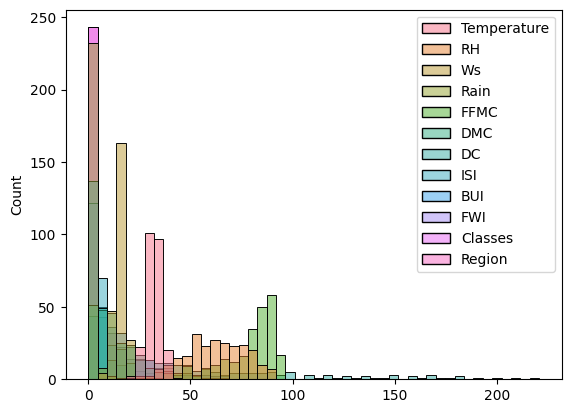

In [88]:
sns.histplot(data)

<Axes: >

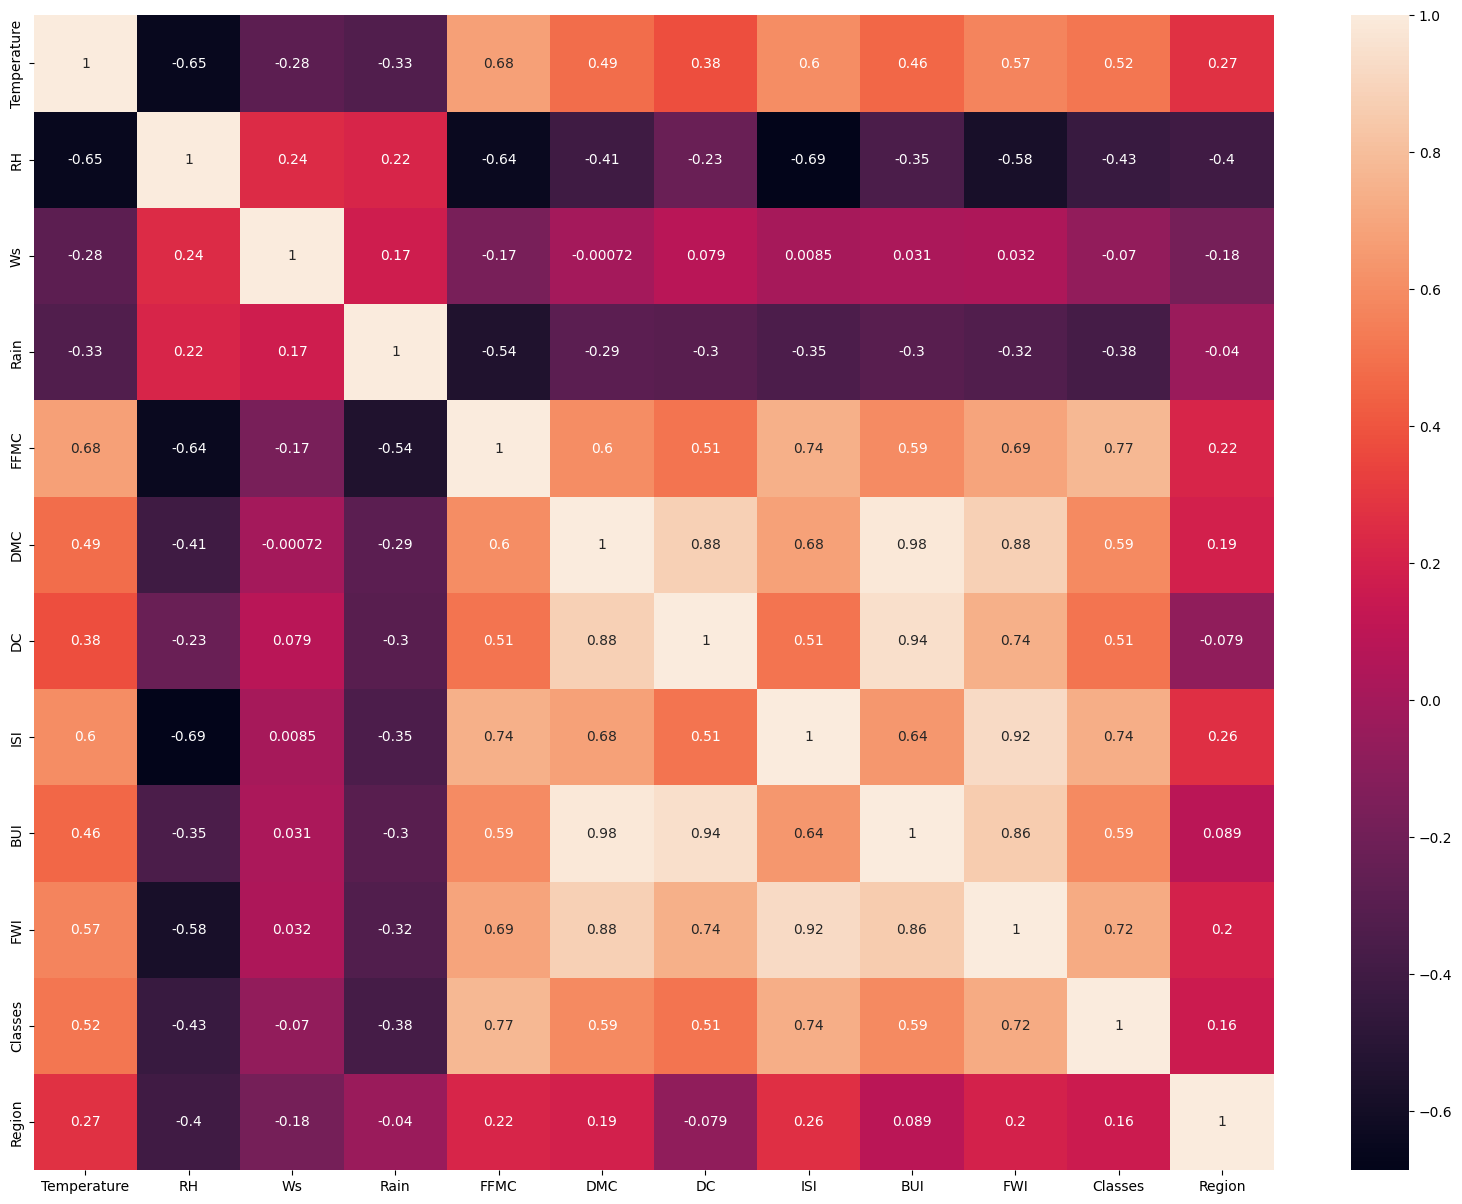

In [89]:
plt.figure(figsize = (20,15))
sns.heatmap(data.corr(), annot = True)

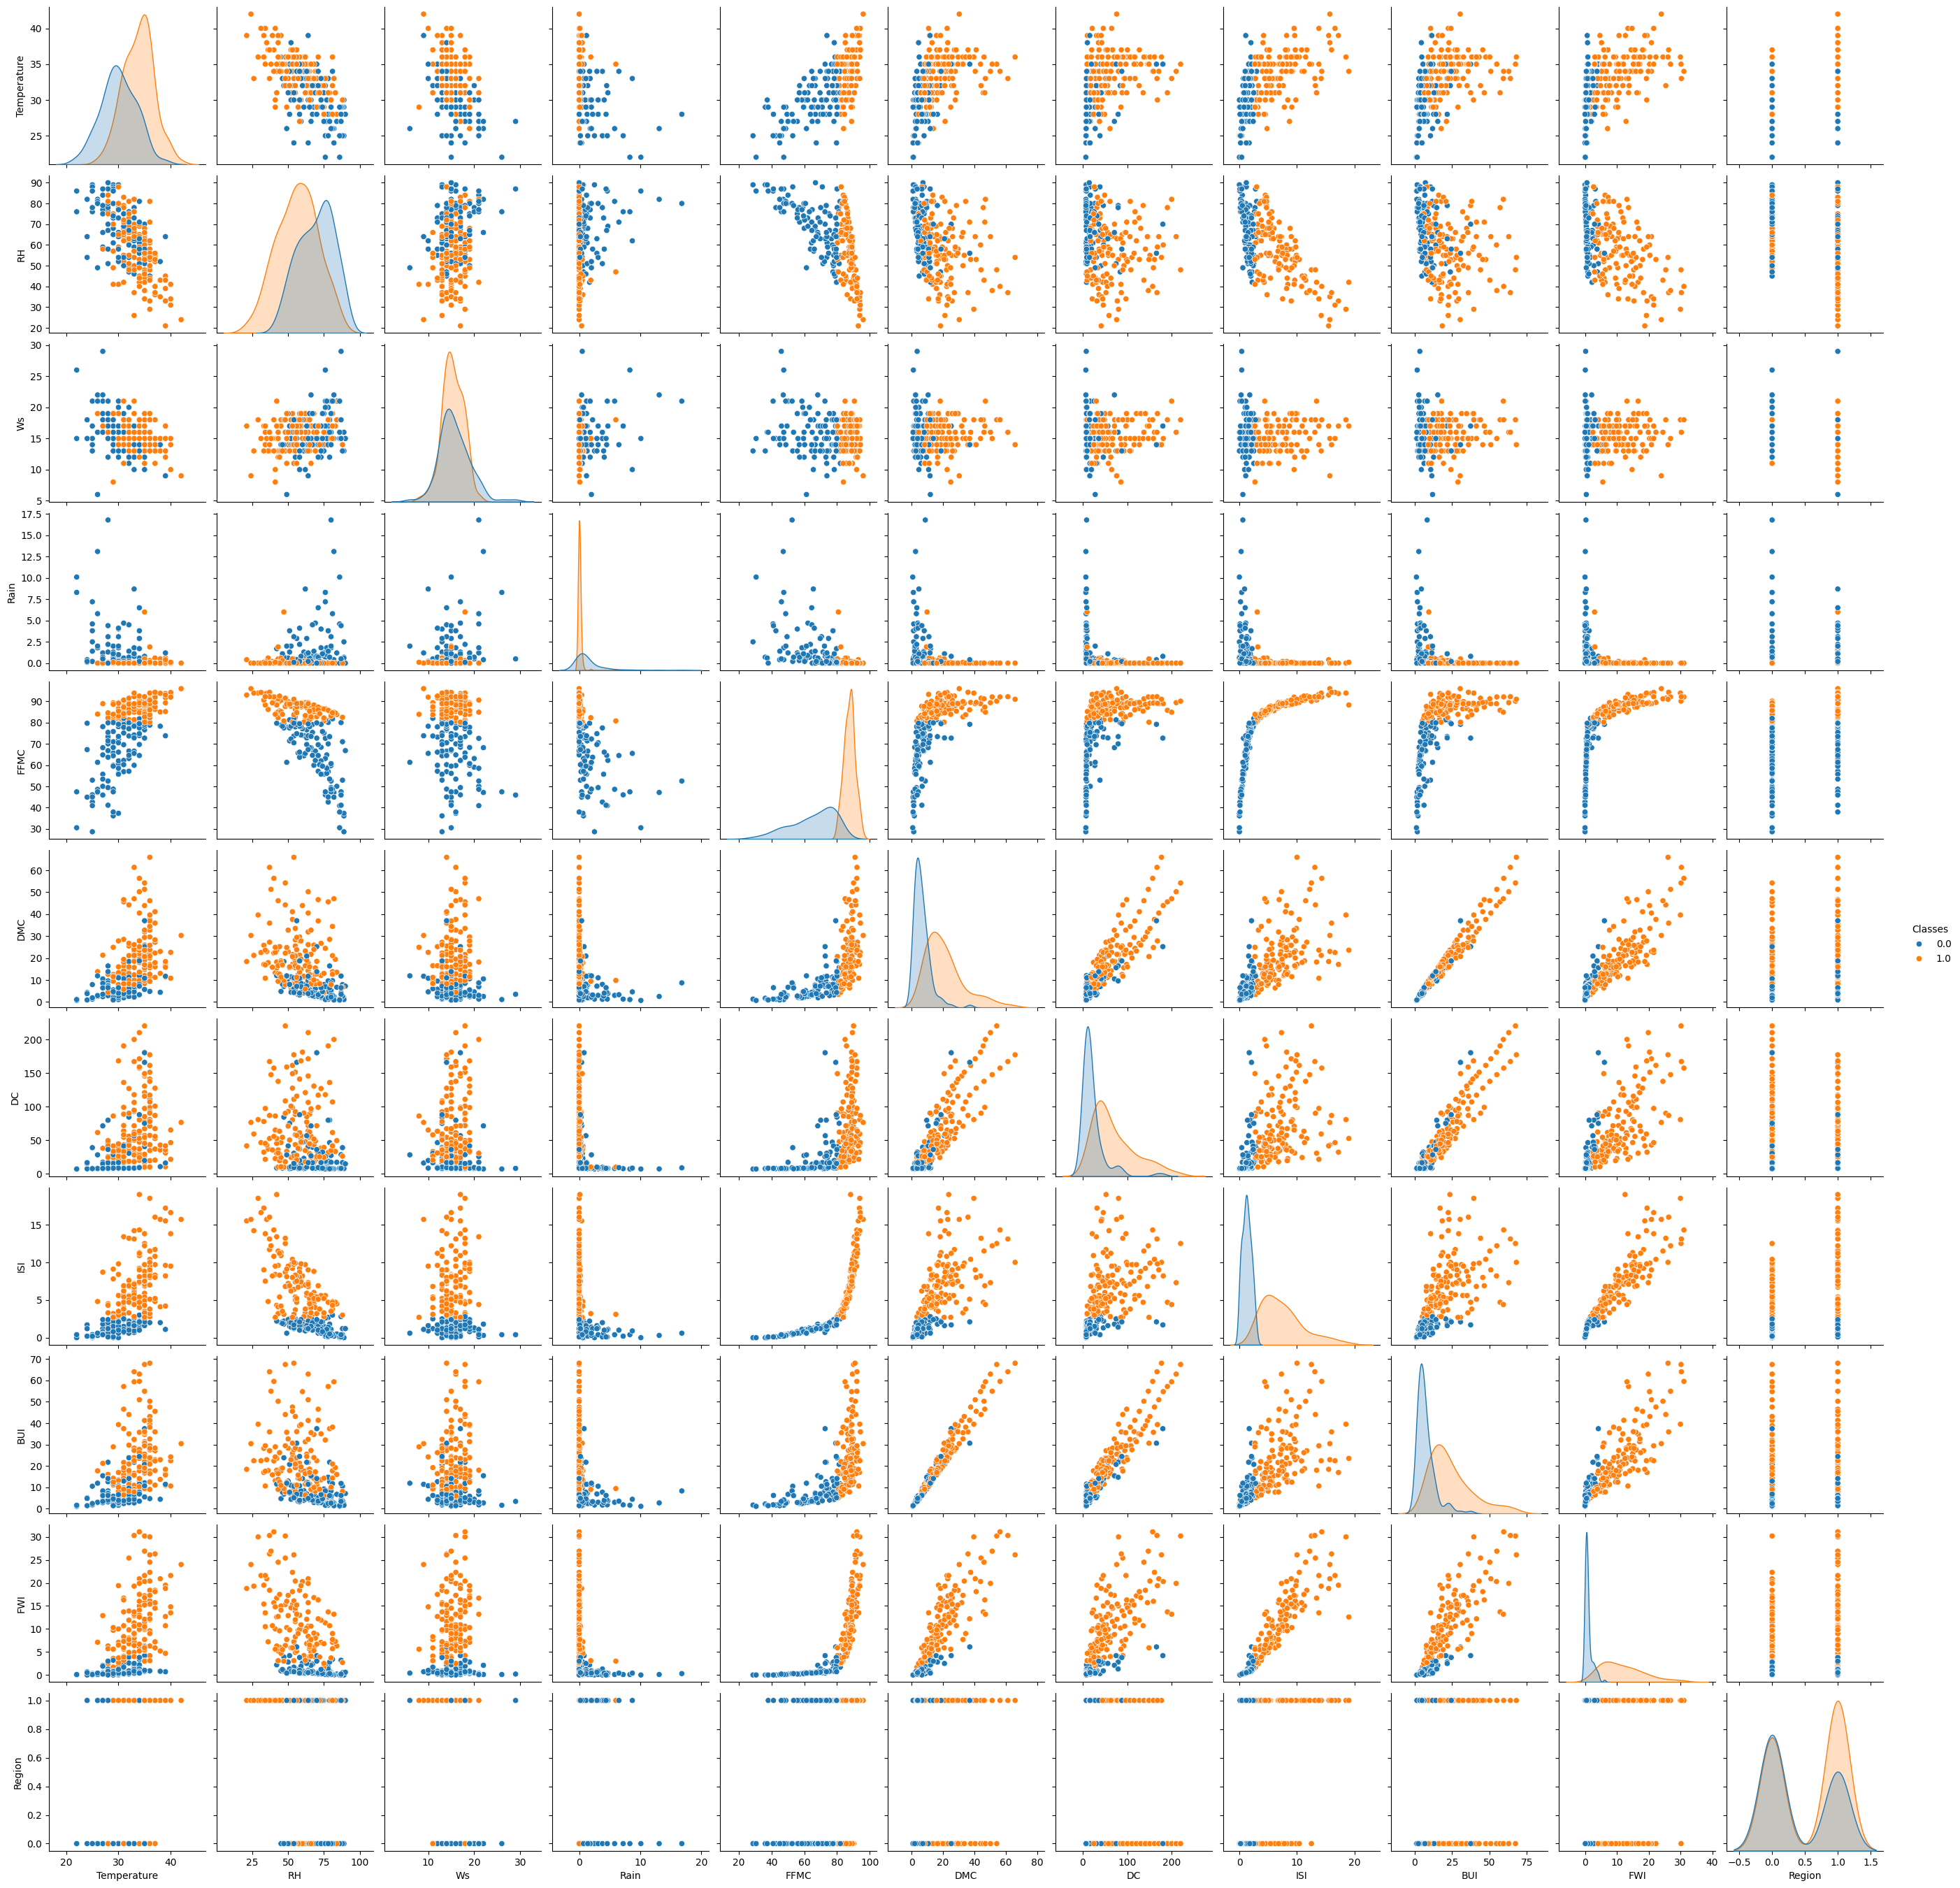

In [90]:
sns.pairplot(data, hue = "Classes")

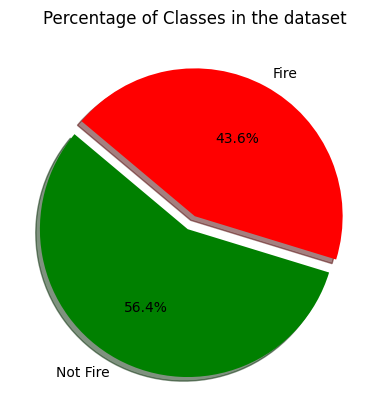

In [91]:
percentage = data["Classes"].value_counts(normalize = True)*100
labels = ["Not Fire", "Fire"]
explode = (0.1,0)
colors = ["green","red"]
plt.pie(percentage, explode = explode, labels = labels, colors = colors, autopct = "%1.1f%%", shadow=True, startangle=140,)
plt.title('Percentage of Classes in the dataset')
plt.show()

In [92]:
data.groupby("Region")["Classes"].value_counts()

Region  Classes
0.0     0.0        63
        1.0        59
1.0     1.0        78
        0.0        43
Name: count, dtype: int64

# **Generating Machine Learning Model for Prediction**

**Machine Learning Algorithms to be Implement:**
- Multiple Linear Regression
- Polynomial Regression
- Ridge Regression
- RidgeCV
- Lasso Regression
- LassoCV
- ElasticNet
- ElasticNetCV

# Import Libraries

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [94]:
x = data.drop(["FWI"], axis = 1)
y = data[["FWI"]]

# Train Test Split

In [95]:
data.shape

(243, 12)

In [96]:
x_train, x_test, y_train , y_test = train_test_split(x,y, test_size =0.20, random_state = 49)

In [97]:
x_train

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
122,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.0,1.0
48,35,59,17,0.0,88.1,12.0,52.8,7.7,18.2,1.0,0.0
108,31,52,14,0.0,87.7,6.4,24.3,6.2,7.7,1.0,0.0
222,29,74,15,1.1,59.5,4.7,8.2,0.8,4.6,0.0,1.0
213,29,86,16,0.0,37.9,0.9,8.2,0.1,1.4,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
114,32,54,11,0.5,73.7,7.9,30.4,1.2,9.6,0.0,0.0
182,38,52,14,0.0,78.3,4.4,10.5,2.0,4.4,0.0,1.0
168,33,68,15,0.0,86.1,23.9,51.6,5.2,23.9,1.0,1.0
173,31,71,17,0.0,87.3,46.6,99.0,6.9,46.5,1.0,1.0


In [98]:
x_test

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
65,34,65,13,0.0,86.8,11.1,29.7,5.2,11.5,1.0,0.0
231,29,41,8,0.1,83.9,24.9,86.0,2.7,28.9,1.0,1.0
109,32,49,11,0.0,89.4,9.8,33.1,6.8,11.3,1.0,0.0
147,36,62,16,0.0,87.8,16.5,34.5,7.0,16.4,1.0,1.0
203,37,53,14,0.0,89.5,41.1,127.5,8.0,45.5,1.0,1.0
159,35,47,18,6.0,80.8,9.8,9.7,3.1,9.4,1.0,1.0
175,39,64,9,1.2,73.8,11.7,15.9,1.1,11.4,0.0,1.0
17,31,78,14,0.3,56.9,1.9,8.0,0.7,2.4,0.0,0.0
53,28,78,16,0.1,70.0,9.6,79.7,1.4,14.7,0.0,0.0
118,31,66,11,0.0,85.7,8.3,24.9,4.0,9.0,1.0,0.0


In [99]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((194, 11), (49, 11), (194, 1), (49, 1))

# Standardize the Data

In [100]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

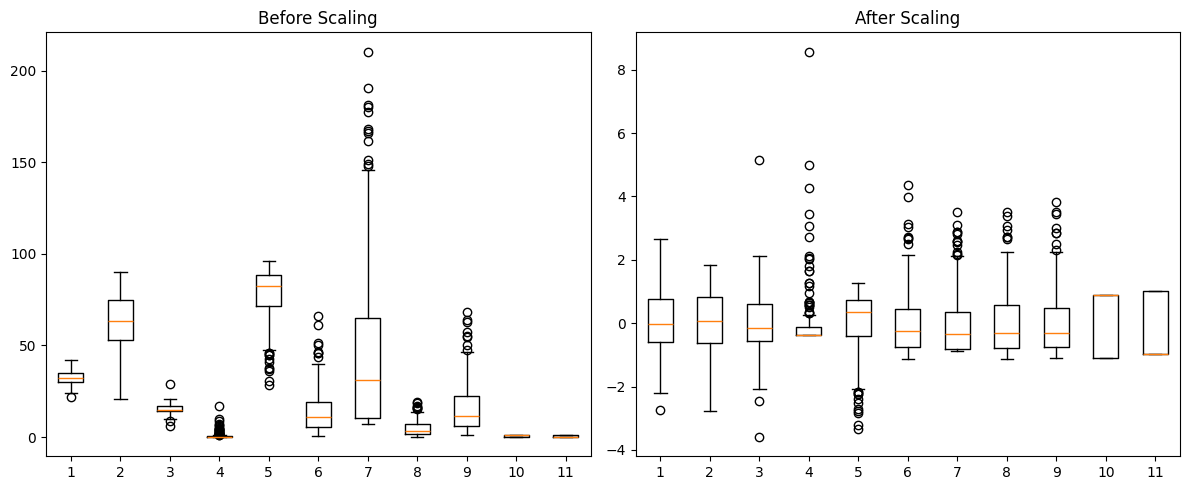

In [101]:
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
plt.boxplot(x_train)
plt.title("Before Scaling")
plt.subplot(1,2,2)
plt.boxplot(x_train_scaled)
plt.title("After Scaling")

plt.tight_layout()
plt.show()

# **Multiple Linear Regression**

In [102]:
regression = LinearRegression(n_jobs = -1)
regression.fit(x_train_scaled, y_train)

LinearRegression(n_jobs=-1)

In [103]:
# Training Accuracy
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, root_mean_squared_error
y_pred_train  = regression.predict(x_train_scaled)
print("Training Accuracy of Multiple Linear Regression: ")
print("R2 Score  ", round(r2_score(y_train, y_pred_train),3)*100,"%")
print("MSE Score ", round(mean_squared_error(y_train, y_pred_train),3))
print("RMSE Score", round(np.sqrt(mean_squared_error(y_train, y_pred_train)),3))
print("MAE Score ", round(mean_absolute_error(y_train, y_pred_train),3))

Training Accuracy of Multiple Linear Regression: 
R2 Score   97.2 %
MSE Score  1.396
RMSE Score 1.182
MAE Score  0.617


In [104]:
# Testing Accuracy
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, root_mean_squared_error
y_pred_test  = regression.predict(x_test_scaled)
print("Testing Accuracy of Multiple Linear Regression: ")
print("R2 Score  ", round(r2_score(y_test, y_pred_test),3)*100,"%")
print("MSE Score ", round(mean_squared_error(y_test, y_pred_test),3))
print("RMSE Score", round(np.sqrt(mean_squared_error(y_test, y_pred_test)),3))
print("MAE Score ", round(mean_absolute_error(y_test, y_pred_test),3))

Testing Accuracy of Multiple Linear Regression: 
R2 Score   98.3 %
MSE Score  1.178
RMSE Score 1.085
MAE Score  0.749


# **Polynomial Regression**

In [105]:
from sklearn.preprocessing import PolynomialFeatures
import joblib
poly = PolynomialFeatures(degree = 2)
x_train_poly = poly.fit_transform(x_train_scaled)
x_test_poly = poly.transform(x_test_scaled)

In [106]:
poly_model = LinearRegression()
poly_model.fit(x_train_poly, y_train)

# Save both model and transformer
joblib.dump(poly_model, "poly_model.pkl")
joblib.dump(poly, "poly.pkl")

['poly.pkl']

In [107]:
# Training Accuracy
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, root_mean_squared_error
y_pred_poly_train  = poly_model.predict(x_train_poly)
print("Training Accuracy of Polynomial Regression: ")
print("R2 Score  ", round(r2_score(y_train, y_pred_poly_train),3)*100,"%")
print("MSE Score ", round(mean_squared_error(y_train, y_pred_poly_train),3))
print("RMSE Score", round(np.sqrt(mean_squared_error(y_train, y_pred_poly_train)),3))
print("MAE Score ", round(mean_absolute_error(y_train, y_pred_poly_train),3))

Training Accuracy of Polynomial Regression: 
R2 Score   100.0 %
MSE Score  0.017
RMSE Score 0.131
MAE Score  0.093


In [108]:
# Testing Accuracy
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, root_mean_squared_error
y_pred_poly_test  = poly_model.predict(x_test_poly)
print("Testing Accuracy of Polynomial Regression: ")
print("R2 Score  ", round(r2_score(y_test, y_pred_poly_test),3)*100,"%")
print("MSE Score ", round(mean_squared_error(y_test, y_pred_poly_test),3))
print("RMSE Score", round(np.sqrt(mean_squared_error(y_test, y_pred_poly_test)),3))
print("MAE Score ", round(mean_absolute_error(y_test, y_pred_poly_test),3))

Testing Accuracy of Polynomial Regression: 
R2 Score   99.8 %
MSE Score  0.158
RMSE Score 0.397
MAE Score  0.284


# **Ridge Regression (Prevent Overfitting)**

In [109]:
#To choose the Value of Alpha, using GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

alphas = np.logspace(-10, 3, 100)
ridge = Ridge()
parameters = {'alpha': alphas}
ridge_reg = GridSearchCV(ridge, parameters, cv=5)
ridge_reg.fit(x_train_scaled, y_train)

print("Best alpha:", ridge_reg.best_params_)

Best alpha: {'alpha': np.float64(5.857020818056673)}


In [110]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha = 5.857)
ridge_model.fit(x_train_scaled, y_train)

Ridge(alpha=5.857)

In [111]:
# Training Accuracy
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, root_mean_squared_error
y_pred_ridge_train  = ridge_model.predict(x_train_scaled)
print("Training Accuracy of Ridge Regression: ")
print("R2 Score  ", round(r2_score(y_train, y_pred_ridge_train),3)*100,"%")
print("MSE Score ", round(mean_squared_error(y_train, y_pred_ridge_train),3))
print("RMSE Score", round(np.sqrt(mean_squared_error(y_train, y_pred_ridge_train)),3))
print("MAE Score ", round(mean_absolute_error(y_train, y_pred_ridge_train),3))

Training Accuracy of Ridge Regression: 
R2 Score   97.1 %
MSE Score  1.491
RMSE Score 1.221
MAE Score  0.714


In [112]:
# Testing Accuracy
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, root_mean_squared_error
y_pred_ridge_test  = ridge_model.predict(x_test_scaled)
print("Testing Accuracy of Ridge Regression: ")
print("R2 Score  ", round(r2_score(y_test, y_pred_ridge_test),3)*100,"%")
print("MSE Score ", round(mean_squared_error(y_test, y_pred_ridge_test),3))
print("RMSE Score", round(np.sqrt(mean_squared_error(y_test, y_pred_ridge_test)),3))
print("MAE Score ", round(mean_absolute_error(y_test, y_pred_ridge_test),3))

Testing Accuracy of Ridge Regression: 
R2 Score   97.89999999999999 %
MSE Score  1.506
RMSE Score 1.227
MAE Score  0.839


# **RidgeCV**

In [113]:
from sklearn.linear_model import RidgeCV
alphas = np.logspace(-6, 3, 100)
ridgecv_model = RidgeCV(alphas = alphas, cv = 5)
ridgecv_model.fit(x_train_scaled, y_train)
ridgecv_model.alpha_

np.float64(5.336699231206313)

In [114]:
# Training Accuracy
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, root_mean_squared_error
y_pred_ridgecv_train  = ridgecv_model.predict(x_train_scaled)
print("Training Accuracy of RidgeCV Regression: ")
print("R2 Score  ", round(r2_score(y_train, y_pred_ridgecv_train),3)*100,"%")
print("MSE Score ", round(mean_squared_error(y_train, y_pred_ridgecv_train),3))
print("RMSE Score", round(np.sqrt(mean_squared_error(y_train, y_pred_ridgecv_train)),3))
print("MAE Score ", round(mean_absolute_error(y_train, y_pred_ridgecv_train),3))

Training Accuracy of RidgeCV Regression: 
R2 Score   97.1 %
MSE Score  1.482
RMSE Score 1.217
MAE Score  0.706


In [115]:
# Testing Accuracy
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, root_mean_squared_error
y_pred_ridgecv_test  = ridgecv_model.predict(x_test_scaled)
print("Testing Accuracy of RidgeCV Regression: ")
print("R2 Score  ", round(r2_score(y_test, y_pred_ridgecv_test),3)*100,"%")
print("MSE Score ", round(mean_squared_error(y_test, y_pred_ridgecv_test),3))
print("RMSE Score", round(np.sqrt(mean_squared_error(y_test, y_pred_ridgecv_test)),3))
print("MAE Score ", round(mean_absolute_error(y_test, y_pred_ridgecv_test),3))

Testing Accuracy of RidgeCV Regression: 
R2 Score   97.89999999999999 %
MSE Score  1.471
RMSE Score 1.213
MAE Score  0.829


# **Lasso Regression (Feature Selection)**

In [116]:
from sklearn.linear_model import Lasso
lasso = Lasso()
alphas = np.logspace(-10,3,100)
parameters = {'alpha': alphas}
lasso_reg = GridSearchCV(lasso, parameters, cv=5)
lasso_reg.fit(x_train_scaled, y_train)

print("Best alpha:", lasso_reg.best_params_)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.180e+01, tolerance: 8.343e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.163e+02, tolerance: 7.400e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.193e+02, tolerance: 8.161e

Best alpha: {'alpha': np.float64(0.04641588833612791)}


In [117]:
lasso_model = Lasso(alpha = 0.04641588833612791)
lasso_model.fit(x_train_scaled, y_train)

Lasso(alpha=0.04641588833612791)

In [118]:
# Training Accuracy
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, root_mean_squared_error
y_pred_lasso_train  = ridgecv_model.predict(x_train_scaled)
print("Training Accuracy of Lasso Regression: ")
print("R2 Score  ", round(r2_score(y_train, y_pred_lasso_train),3)*100,"%")
print("MSE Score ", round(mean_squared_error(y_train, y_pred_lasso_train),3))
print("RMSE Score", round(np.sqrt(mean_squared_error(y_train, y_pred_lasso_train)),3))
print("MAE Score ", round(mean_absolute_error(y_train, y_pred_lasso_train),3))

Training Accuracy of Lasso Regression: 
R2 Score   97.1 %
MSE Score  1.482
RMSE Score 1.217
MAE Score  0.706


In [119]:
# Testing Accuracy
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, root_mean_squared_error
y_pred_lasso_test  = ridgecv_model.predict(x_test_scaled)
print("Testing Accuracy of Lasso Regression: ")
print("R2 Score  ", round(r2_score(y_test, y_pred_lasso_test),3)*100,"%")
print("MSE Score ", round(mean_squared_error(y_test, y_pred_lasso_test),3))
print("RMSE Score", round(np.sqrt(mean_squared_error(y_test, y_pred_lasso_test)),3))
print("MAE Score ", round(mean_absolute_error(y_test, y_pred_lasso_test),3))

Testing Accuracy of Lasso Regression: 
R2 Score   97.89999999999999 %
MSE Score  1.471
RMSE Score 1.213
MAE Score  0.829


# **LassoCV**

In [120]:
from sklearn.linear_model import LassoCV
alphas = np.logspace(-6, 3, 100)
lassocv_model = LassoCV(alphas = alphas, cv = 5)
lassocv_model.fit(x_train_scaled, y_train)
lassocv_model.alpha_

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:1664: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


np.float64(0.028480358684358047)

In [121]:
# Training Accuracy
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, root_mean_squared_error
y_pred_lassocv_train  = lassocv_model.predict(x_train_scaled)
print("Training Accuracy of LassoCV Regression: ")
print("R2 Score  ", round(r2_score(y_train, y_pred_lassocv_train),3)*100,"%")
print("MSE Score ", round(mean_squared_error(y_train, y_pred_lassocv_train),3))
print("RMSE Score", round(np.sqrt(mean_squared_error(y_train, y_pred_lassocv_train)),3))
print("MAE Score ", round(mean_absolute_error(y_train, y_pred_lassocv_train),3))

Training Accuracy of LassoCV Regression: 
R2 Score   97.2 %
MSE Score  1.428
RMSE Score 1.195
MAE Score  0.618


In [122]:
# Testing Accuracy
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, root_mean_squared_error
y_pred_lassocv_test  = lassocv_model.predict(x_test_scaled)
print("Testing Accuracy of LassoCV Regression: ")
print("R2 Score  ", round(r2_score(y_test, y_pred_lassocv_test),3)*100,"%")
print("MSE Score ", round(mean_squared_error(y_test, y_pred_lassocv_test),3))
print("RMSE Score", round(np.sqrt(mean_squared_error(y_test, y_pred_lassocv_test)),3))
print("MAE Score ", round(mean_absolute_error(y_test, y_pred_lassocv_test),3))

Testing Accuracy of LassoCV Regression: 
R2 Score   98.3 %
MSE Score  1.225
RMSE Score 1.107
MAE Score  0.751


# **ElasticNet Regression**

In [123]:
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet()
alphas = np.logspace(-6,3,100)
l1_ratio = np.linspace(0.1, 1, 10)
parameters = {'alpha': alphas, 'l1_ratio': l1_ratio}
elasticnet_reg = GridSearchCV(elasticnet, parameters, cv=5)
elasticnet_reg.fit(x_train_scaled, y_train)

print("Best alpha:", elasticnet_reg.best_params_)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.179e+01, tolerance: 8.343e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.345e+01, tolerance: 7.400e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.045e+02, tolerance: 8.161e

Best alpha: {'alpha': np.float64(0.043287612810830614), 'l1_ratio': np.float64(0.30000000000000004)}


In [124]:
elasticnet_model = ElasticNet(alpha = 0.043287612810830614, l1_ratio = 0.30000000000000004)
elasticnet_model.fit(x_train_scaled, y_train)

ElasticNet(alpha=0.043287612810830614, l1_ratio=0.30000000000000004)

In [125]:
# Training Accuracy
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, root_mean_squared_error
y_pred_elasticnet_train  = elasticnet_model.predict(x_train_scaled)
print("Training Accuracy of ElasticNet Regression: ")
print("R2 Score  ", round(r2_score(y_train, y_pred_elasticnet_train),3)*100,"%")
print("MSE Score ", round(mean_squared_error(y_train, y_pred_elasticnet_train),3))
print("RMSE Score", round(np.sqrt(mean_squared_error(y_train, y_pred_elasticnet_train)),3))
print("MAE Score ", round(mean_absolute_error(y_train, y_pred_elasticnet_train),3))

Training Accuracy of ElasticNet Regression: 
R2 Score   97.0 %
MSE Score  1.501
RMSE Score 1.225
MAE Score  0.718


In [126]:
# Testing Accuracy
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, root_mean_squared_error
y_pred_elasticnet_test  = elasticnet_model.predict(x_test_scaled)
print("Testing Accuracy of ElasticNet Regression: ")
print("R2 Score  ", round(r2_score(y_test, y_pred_elasticnet_test),3)*100,"%")
print("MSE Score ", round(mean_squared_error(y_test, y_pred_elasticnet_test),3))
print("RMSE Score", round(np.sqrt(mean_squared_error(y_test, y_pred_elasticnet_test)),3))
print("MAE Score ", round(mean_absolute_error(y_test, y_pred_elasticnet_test),3))

Testing Accuracy of ElasticNet Regression: 
R2 Score   97.8 %
MSE Score  1.529
RMSE Score 1.237
MAE Score  0.846


# **ElasticNetCV**

In [127]:
from sklearn.linear_model import ElasticNetCV
alphas = np.logspace(-6, 3, 100)
elasticnetcv_model = ElasticNetCV(alphas = alphas, l1_ratio = 0.30000000000000004, cv = 5)
elasticnetcv_model.fit(x_train_scaled, y_train)
elasticnetcv_model.alpha_

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:1664: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.996202620575609, tolerance: 0.8343241548387094
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.724744356467184, tolerance: 0.8343241548387094
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective di

np.float64(0.028480358684358047)

In [128]:
# Training Accuracy
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, root_mean_squared_error
y_pred_elasticnetcv_train  = elasticnet_model.predict(x_train_scaled)
print("Training Accuracy of ElasticNetCV Regression: ")
print("R2 Score  ", round(r2_score(y_train, y_pred_elasticnetcv_train),3)*100,"%")
print("MSE Score ", round(mean_squared_error(y_train, y_pred_elasticnetcv_train),3))
print("RMSE Score", round(np.sqrt(mean_squared_error(y_train, y_pred_elasticnetcv_train)),3))
print("MAE Score ", round(mean_absolute_error(y_train, y_pred_elasticnetcv_train),3))

Training Accuracy of ElasticNetCV Regression: 
R2 Score   97.0 %
MSE Score  1.501
RMSE Score 1.225
MAE Score  0.718


In [129]:
# Testing Accuracy
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, root_mean_squared_error
y_pred_elasticnetcv_test  = elasticnetcv_model.predict(x_test_scaled)
print("Testing Accuracy of ElasticNetCV Regrssion: ")
print("R2 Score  ", round(r2_score(y_test, y_pred_elasticnetcv_test),3)*100,"%")
print("MSE Score ", round(mean_squared_error(y_test, y_pred_elasticnetcv_test),3))
print("RMSE Score", round(np.sqrt(mean_squared_error(y_test, y_pred_elasticnetcv_test)),3))
print("MAE Score ", round(mean_absolute_error(y_test, y_pred_elasticnetcv_test),3))

Testing Accuracy of ElasticNetCV Regrssion: 
R2 Score   98.0 %
MSE Score  1.385
RMSE Score 1.177
MAE Score  0.805


# **Models Evaluations**

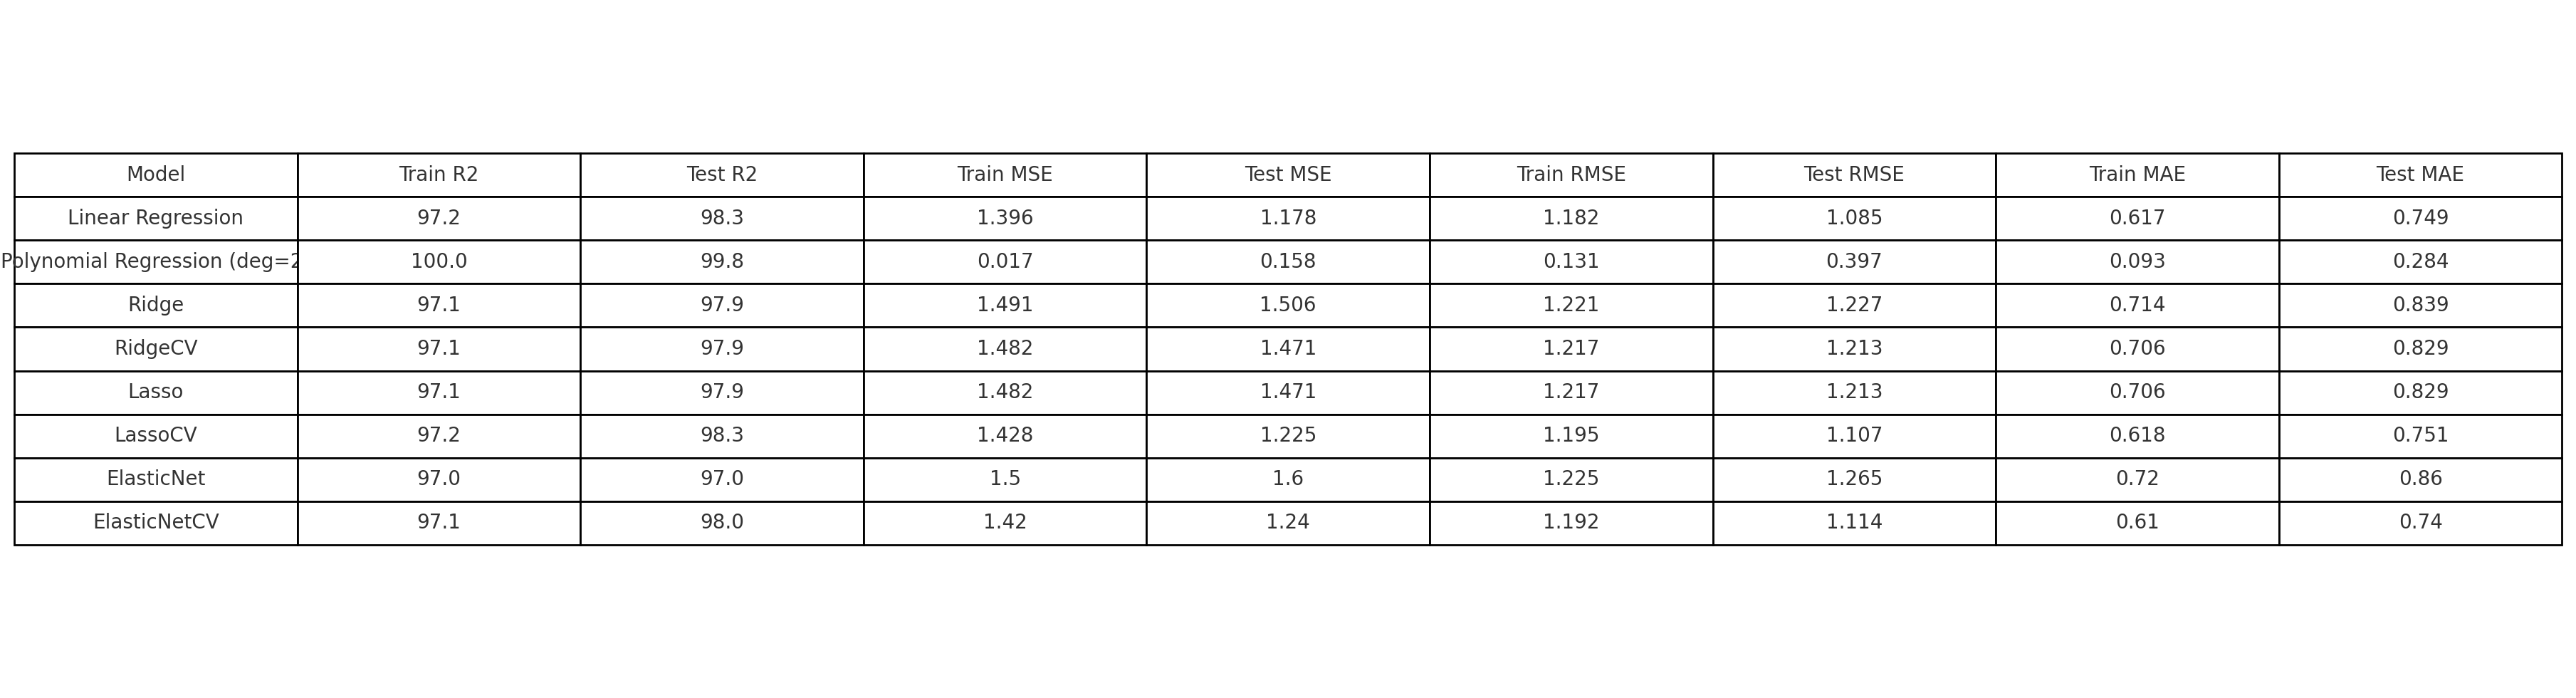

*We should choose the Polynomial Regression model (degree = 2) because it significantly outperforms all other models in both training and testing metrics. It achieves a perfect R² score of 100% on training data and 99.8% on testing data, indicating it captures the underlying pattern of the data exceptionally well without major overfitting. Additionally, its MSE, RMSE, and MAE scores are the lowest among all models, which means it makes the smallest prediction errors. These results show that Polynomial Regression not only fits the training data closely but also generalizes well to unseen data, making it the most precise and accurate choice for prediction in this case.*




# **Deployment of Model**

In [130]:
from google.colab import files

#files.download('scaler.pkl')
#files.download('poly_model.pkl')

In [131]:
import pandas as pd
import joblib

# 1️⃣ Load the trained model and polynomial transformer
poly_model = joblib.load("poly_model.pkl")      # Trained Polynomial Regression model
poly = joblib.load("poly.pkl")                  # Trained PolynomialFeatures transformer

# 2️⃣ Define input features (must match the model's training data)
features = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'Classes', 'Region']

# 3️⃣ Input Section with Explanations
print("\n🔥 Forest Fire Prediction System 🔥")
print("Please enter the following environmental parameters:\n")

# 🌡️ Ambient Temperature
Temperature = int(input("1. Temperature (°C): "))  # Temperature of the air in degrees Celsius

# 💧 Relative Humidity
RH = int(input("2. Relative Humidity (%): "))  # The percentage of moisture present in the air

# 🌬️ Wind Speed
Ws = int(input("3. Wind Speed (km/h): "))  # Wind speed in kilometers per hour

# 🌧️ Rainfall
Rain = float(input("4. Rainfall (mm): "))  # Amount of rainfall in millimeters

# 🔥 Fine Fuel Moisture Code
FFMC = float(input("5. FFMC (Fine Fuel Moisture Code): "))  # Moisture content of small forest fuels

# 🍂 Duff Moisture Code
DMC = float(input("6. DMC (Duff Moisture Code): "))  # Moisture level in loosely compacted organic soil

# 🏜️ Drought Code
DC = float(input("7. DC (Drought Code): "))  # Long-term dryness of deep soil layers

# 🚀 Initial Spread Index
ISI = float(input("8. ISI (Initial Spread Index): "))  # Potential rate of fire spread at ignition

# 📈 Build-Up Index
BUI = float(input("9. BUI (Build-Up Index): "))  # Amount of fuel available for fire

# 🔥 Fire Class
Classes = float(input("10. Fire Class (1 = Fire occurred, 0 = No fire): "))  # Class label for fire event

# 🗺️ Region
Region = float(input("11. Region (1 = Bejaia, 2 = Sidi-Bel Abbes): "))  # Region encoding

# 4️⃣ Form a DataFrame
input_data = pd.DataFrame([[Temperature, RH, Ws, Rain, FFMC, DMC, DC, ISI, BUI, Classes, Region]],
                          columns=features)

# 5️⃣ Transform input using the same polynomial transformer
input_poly = poly.transform(input_data)

# 6️⃣ Predict FWI
predicted_fwi = poly_model.predict(input_poly)[0]

# 7️⃣ Show the result
print(f"\n🔥 Predicted FWI (Fire Weather Index): {round(predicted_fwi.item(), 2)}")



🔥 Forest Fire Prediction System 🔥
Please enter the following environmental parameters:

1. Temperature (°C): 38
2. Relative Humidity (%): 59
3. Wind Speed (km/h): 85
4. Rainfall (mm): 130
5. FFMC (Fine Fuel Moisture Code): 12
6. DMC (Duff Moisture Code): 36
7. DC (Drought Code): 53
8. ISI (Initial Spread Index): 45
9. BUI (Build-Up Index): 14
10. Fire Class (1 = Fire occurred, 0 = No fire): 1
11. Region (1 = Bejaia, 2 = Sidi-Bel Abbes): 1

🔥 Predicted FWI (Fire Weather Index): 153.33


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(
